In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib qt


In [2]:
dataFolderName = r'C:\DTU\Data\201911_StudentsFatigue\Data'

for root, dirs, subfolder in os.walk(dataFolderName):
    if not dirs:
        
        if 'ANT' not in root:
            continue
            
        for file in subfolder:
            if 'Summary' not in file:
                fileName = root + '\\' + file
                
                if '_1' in file:
                    df_p1 = pd.read_csv(fileName)
                    print('1: ', fileName)
                else:
                    df_p2 = pd.read_csv(fileName)
                    print('2: ', fileName)
                    
                

1:  C:\DTU\Data\201911_StudentsFatigue\Data\ABSH\ANT\ABSH_1 - 2019-11-13 - Data.csv
2:  C:\DTU\Data\201911_StudentsFatigue\Data\ABSH\ANT\ABSH_2 - 2019-11-13 - Data.csv
1:  C:\DTU\Data\201911_StudentsFatigue\Data\AW\ANT\aw_1 - 2019-11-12 - Data.csv
2:  C:\DTU\Data\201911_StudentsFatigue\Data\AW\ANT\aw_2 - 2019-11-12 - Data.csv
1:  C:\DTU\Data\201911_StudentsFatigue\Data\CBK\ANT\CBK_1 - 2019-11-08 - Data.csv
2:  C:\DTU\Data\201911_StudentsFatigue\Data\CBK\ANT\cbk_2 - 2019-11-08 - Data.csv
2:  C:\DTU\Data\201911_StudentsFatigue\Data\CBK\ANT\cbk_3 - 2019-11-08 - Data.csv
2:  C:\DTU\Data\201911_StudentsFatigue\Data\CBK\ANT\cbk_4 - 2019-11-08 - Data.csv
1:  C:\DTU\Data\201911_StudentsFatigue\Data\cet\ANT\CET_1 - 2019-11-11 - Data.csv
2:  C:\DTU\Data\201911_StudentsFatigue\Data\cet\ANT\CET_2 - 2019-11-11 - Data.csv
2:  C:\DTU\Data\201911_StudentsFatigue\Data\cet\p1\ANT\CET - 2019-11-11 - Data.csv
1:  C:\DTU\Data\201911_StudentsFatigue\Data\Jph\ANT\jph_1 - 2019-11-13 - Data.csv
1:  C:\DTU\Data

# Reaction time

### Mean reaction time

Text(0.5, 1.0, 'Total reaction time')

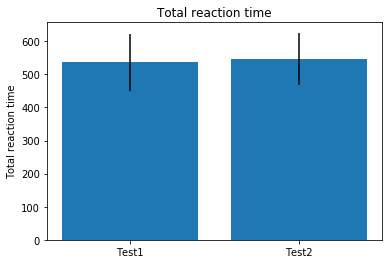

In [3]:
rtMean_p1 = df_p1.RT.mean()
rtStd_p1 = df_p1.RT.std()

rtMean_p2 = df_p2.RT.mean()
rtStd_p2 = df_p2.RT.std()

plt.bar([1,2], [rtMean_p1, rtMean_p2], yerr = [rtStd_p1, rtStd_p2])
plt.xticks([1,2], ['Test1', 'Test2'])
plt.ylabel('Total reaction time')
plt.title('Total reaction time')


### Conflicting

Text(0.5, 1.0, 'Conflicting reaction time')

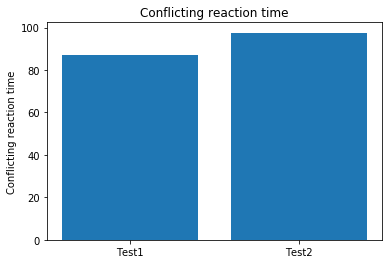

In [4]:
rtMean_congruent_p1 = df_p1.RT[df_p1.Congruency=='congruent'].mean()
rtMean_incongruent_p1 = df_p1.RT[df_p1.Congruency=='incongruent'].mean()

rtMean_congruent_p1 = df_p1.RT[df_p1.Congruency=='congruent'].mean()
rtMean_incongruent_p1 = df_p1.RT[df_p1.Congruency=='incongruent'].mean()

RTMean_conflicting_p1 = rtMean_incongruent_p1 - rtMean_congruent_p1


rtMean_congruent_p2 = df_p2.RT[df_p2.Congruency=='congruent'].mean()
rtMean_incongruent_p2 = df_p2.RT[df_p2.Congruency=='incongruent'].mean()
RTMean_conflicting_p2 = rtMean_incongruent_p2 - rtMean_congruent_p2




plt.figure()
plt.bar([1,2], [RTMean_conflicting_p1, RTMean_conflicting_p2])
plt.xticks([1,2], ['Test1', 'Test2', 'Test3', 'Test4'])
plt.ylabel('Conflicting reaction time')
plt.title('Conflicting reaction time')

### Orienting

In [17]:
rtMean_center_p1 = df_p1.RT[df_p1.CueType==2].mean()
rtMean_spatial_p1 = df_p1.RT[df_p1.CueType==4].mean()

RTMean_orienting_p1 = rtMean_center_p1 - rtMean_spatial_p1

rtMean_center_p2 = df_p2.RT[df_p2.CueType==2].mean()
rtMean_spatial_p2 = df_p2.RT[df_p2.CueType==4].mean()

RTMean_orienting_p2 = rtMean_center_p2 - rtMean_spatial_p2

plt.figure()
plt.bar([1,2], [RTMean_orienting_p1, RTMean_orienting_p2])
plt.xticks([1,2], ['Test1', 'Test2'])
plt.ylabel('Orienting reaction time')
plt.title('Orienting reaction time')

Text(0.5, 1.0, 'Orienting reaction time')

### Alerting

In [20]:
rtMean_noCue_p1 = df_p1.RT[df_p1.CueType==1].mean()
rtMean_doubleCue_p1 = df_p1.RT[df_p1.CueType==3].mean()
RTMean_alerting_p1 = rtMean_noCue_p1 - rtMean_doubleCue_p1


rtMean_noCue_p2 = df_p2.RT[df_p2.CueType==1].mean()
rtMean_doubleCue_p2 = df_p2.RT[df_p2.CueType==3].mean()
RTMean_alerting_p2 = rtMean_noCue_p2 - rtMean_doubleCue_p2

plt.figure()
plt.bar([1,2], [RTMean_alerting_p1, RTMean_alerting_p2])
plt.xticks([1,2], ['Test1', 'Test2'])
plt.ylabel('Alerting reaction time')
plt.title('Alerting reaction time')


Text(0.5, 1.0, 'Alerting reaction time')

# Accuracy

### Congruency

In [22]:
accuracy_congruent_p1 = df_p1.Correct[np.logical_and(df_p1.Correct==1, df_p1.Congruency=='congruent')].count()/len(df_p1[df_p1.Congruency=='congruent'])
accuracy_incongruent_p1 = df_p1.RT[np.logical_and(df_p1.Correct==1, df_p1.Congruency=='incongruent')].count()/len(df_p1[df_p1.Congruency=='congruent'])


accuracy_congruent_p2 = df_p2.RT[np.logical_and(df_p2.Correct==1, df_p2.Congruency=='congruent')].count()/len(df_p2[df_p2.Congruency=='congruent'])
accuracy_incongruent_p2 = df_p2.RT[np.logical_and(df_p2.Correct==1, df_p2.Congruency=='incongruent')].count()/len(df_p2[df_p2.Congruency=='congruent'])



plt.figure()
plt.bar([1,2], [accuracy_congruent_p1, accuracy_congruent_p2], width=0.4, label = 'congruent')

plt.bar([1.5, 2.5], [accuracy_incongruent_p1, accuracy_incongruent_p2], width=0.4, label = 'incongruent')
plt.xticks([1.25,2.25], ['Test1', 'Test2'])
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()